# Objective
**- To classify the given leaf image as ['FRESH', 'HALF-FRESH', 'SPOILED']**<br>
**- Meat Freshness Image Classification   problem**<br>

# Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,f1_score
import tensorflow as tf
import cv2
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.decomposition import TruncatedSVD
import time
import pickle

# Data preprocessing

**- Loading and splitting data<br>**
**- Train:80% and Validation:20%**

In [2]:
import os

# Change the current working directory to 'D:\\SARAVANA\\BRAIN-TUMOR-DETECTION-USING-NEURAL-NETWORK\\data'
os.chdir(r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets')

# Get the current working directory to confirm the change
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets


# EDA

Found 179 files belonging to 2 classes.
Found 72 files belonging to 2 classes.


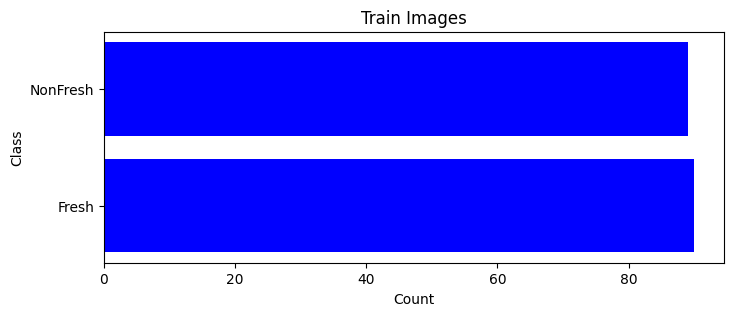

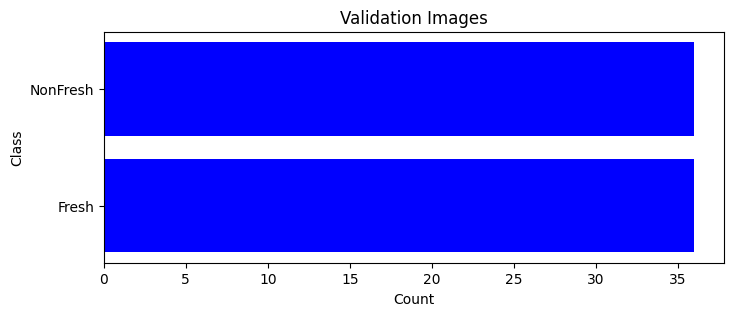

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Example: Define the datasets (replace with your actual data loading method)
# Assuming you are using TensorFlow for loading the dataset
# Replace 'path/to/train' and 'path/to/val' with your dataset directories
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\working\train', 
    labels='inferred',
    label_mode='int',
    batch_size=32, 
    image_size=(224, 224)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\working\val', 
    labels='inferred',
    label_mode='int',
    batch_size=32, 
    image_size=(224, 224)
)

# Function to plot the distribution of labels
def plot_distribution(y, title):
    a = Counter(y)
    y_labels = ['Fresh', 'NonFresh']  # Update these labels to match your dataset
    x = [a.get(i, 0) for i in range(len(y_labels))]
    plt.figure(figsize=(8, 3))
    plt.barh(y_labels, x, color='blue')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Class')
    plt.show()

# Extract labels from the datasets
y_train = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
y_val = np.concatenate([y.numpy() for x, y in val_ds], axis=0)

# Plot distributions
plot_distribution(y_train, title="Train Images")
plot_distribution(y_val, title="Validation Images")


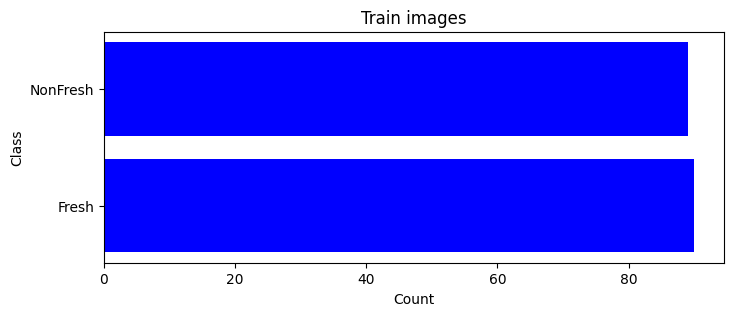

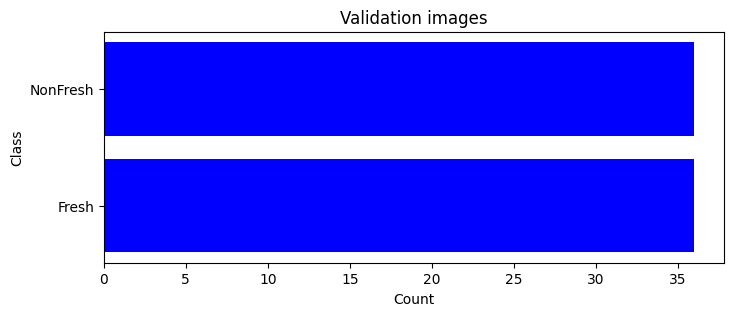

In [4]:
# Target distribution

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title = "Validation images")

Found 400 files belonging to 2 classes.
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\Fresh\HamsiTaze (1).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\Fresh\HamsiTaze (10).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\Fresh\HamsiTaze (100).jpg


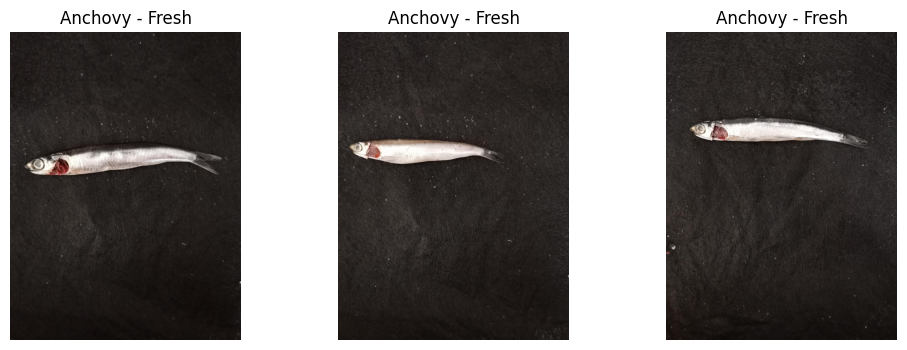

Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\NonFresh\HamsiBayat (1).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\NonFresh\HamsiBayat (10).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\NonFresh\HamsiBayat (100).jpg


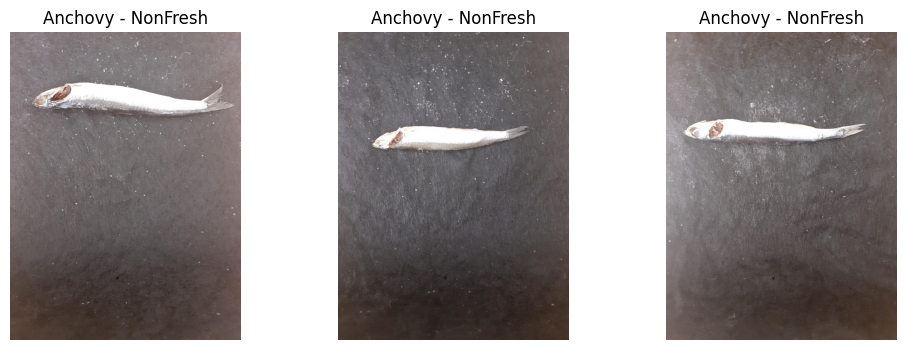

Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\Fresh\IstavritTaze (1).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\Fresh\IstavritTaze (10).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\Fresh\IstavritTaze (100).jpg


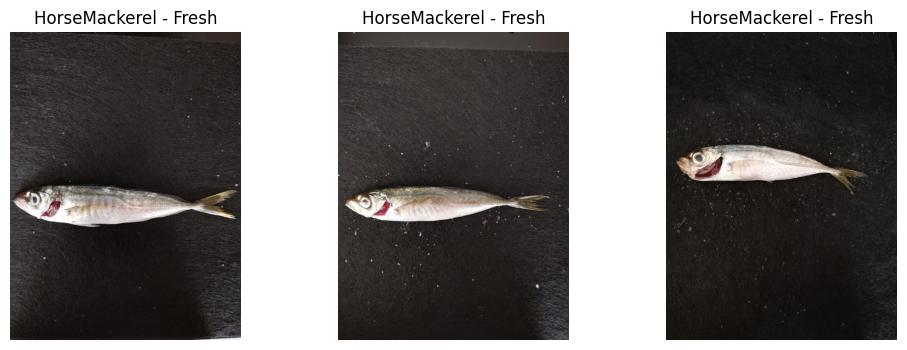

Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\NonFresh\IstavritBayat (1).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\NonFresh\IstavritBayat (10).jpg
Loading image: D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\NonFresh\IstavritBayat (100).jpg


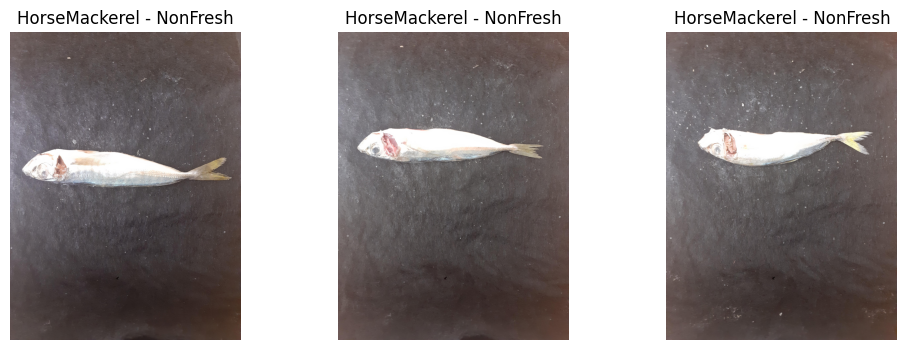

In [5]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the path to your dataset
data_dir = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets'  # Path to your dataset

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)  # Adjust based on your image size
)

# Get the class names from the dataset
class_names = train_ds.class_names

# Define allowed image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Display sample images from each class
for class_name in class_names:
    # Get the path to the class directory
    class_dir = os.path.join(data_dir, class_name)
    
    if not os.path.isdir(class_dir):
        print(f"Directory not found: {class_dir}")
        continue
    
    # Get all subdirectories (which should be the actual image directories)
    subdirs = [d for d in os.listdir(class_dir) if os.path.isdir(os.path.join(class_dir, d))]
    
    for subdir in subdirs:
        subdir_path = os.path.join(class_dir, subdir)
        
        # Get all image files in the subdirectory
        all_files = os.listdir(subdir_path)
        
        # Filter image files
        imgs = [f for f in all_files if os.path.isfile(os.path.join(subdir_path, f)) and os.path.splitext(f)[1].lower() in image_extensions][:3]
        
        if not imgs:
            print(f"No image files found in subdirectory: {subdir_path}")
            continue
        
        plt.figure(figsize=(12, 4))
        
        # Plot the images
        for i, img in enumerate(imgs):
            img_path = os.path.join(subdir_path, img)
            print(f"Loading image: {img_path}")

            try:
                img_data = plt.imread(img_path)
                ax = plt.subplot(1, 3, i + 1)
                plt.imshow(img_data)
                plt.title(f"{class_name} - {subdir}")
                plt.axis('off')
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
        
        plt.show()


# Model Training

In [6]:
import tensorflow as tf

# Define the path to your dataset
data_dir = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets'  # Path to your dataset

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset="training",  # Correct keyword for training subset
    validation_split=0.2,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    seed=123  # Ensures reproducibility
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset="validation",  # Correct keyword for validation subset
    validation_split=0.2,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    seed=123  # Ensures reproducibility
)

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.
Using 80 files for validation.


In [7]:
import tensorflow as tf

# Define image dimensions (use the same as used for dataset)
img_height = 224
img_width = 224

# Number of classes
num_classes = 3

# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),  # Use Rescaling directly

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)

# Train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[earlystop_callback])


Epoch 1/20


c:\Users\sutha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.4773 - loss: 0.9646 - val_accuracy: 0.7625 - val_loss: 0.4713
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.8428 - loss: 0.3683 - val_accuracy: 0.9000 - val_loss: 0.2662
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.8979 - loss: 0.2327 - val_accuracy: 0.9375 - val_loss: 0.1443
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.9496 - loss: 0.1320 - val_accuracy: 0.9625 - val_loss: 0.1067
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9585 - loss: 0.1032 - val_accuracy: 0.9750 - val_loss: 0.0882
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9735 - loss: 0.0825 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.9903 - loss: 0.0259 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9932 - loss: 0.0236 - val_accuracy: 1.0000 - val_

# Model Evaluation

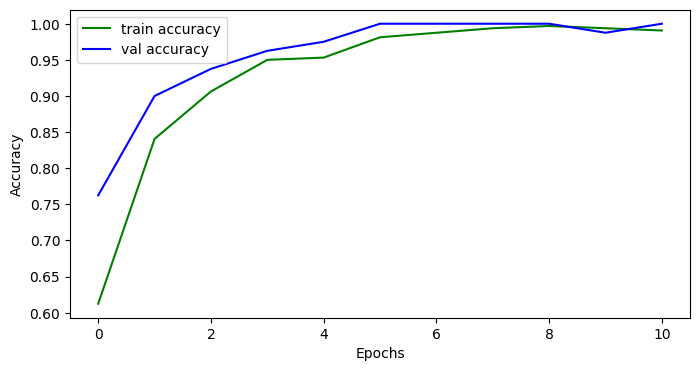

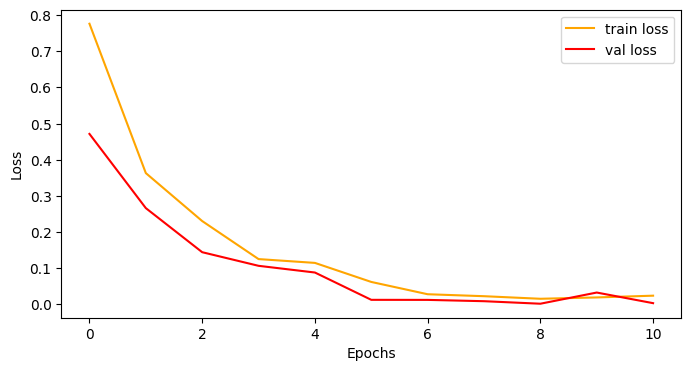

In [8]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='blue', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss plots
plt.figure(figsize=(8, 4))
plt.plot(train_loss, color='orange', linestyle='-', label='train loss')
plt.plot(valid_loss, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
batch_size = 32

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    subset="validation",
    validation_split=0.2,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(224, 224),
    seed=123  # Ensures reproducibility
)

# Evaluate the model
loss, acc = model.evaluate(val_ds)

print("Validation accuracy:", round(acc, 2))
print("Validation loss:", round(loss, 2))


Found 400 files belonging to 3 classes.
Using 80 files for validation.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.0026
Validation accuracy: 1.0
Validation loss: 0.0


In [23]:
import numpy as np

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


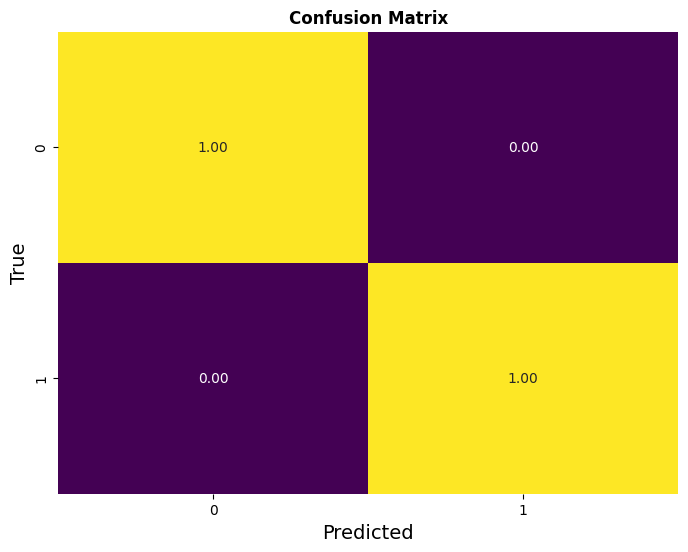

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example: Define correct_labels and predicted_labels
# correct_labels = np.array([...])
# predicted_labels = np.array([...])

# Compute confusion matrix
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None, fmt='.2f')
plt.title("Confusion Matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()


In [25]:
import numpy as np
from sklearn.metrics import classification_report

# Example: Define correct_labels and predicted_labels
# correct_labels = np.array([...])
# predicted_labels = np.array([...])

# Print classification report
report = classification_report(correct_labels, predicted_labels)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Post Processing

In [26]:
# model.save("model_v2.keras")

In [15]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.models import load_model
# from sklearn.metrics import confusion_matrix, classification_report

# # Define the path to your dataset
# data_dir = r'C:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets'  # Update this path as needed
# img_height, img_width = 224, 224  # Image size

# # Load the training dataset
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="training",
#     labels='inferred',
#     label_mode='int',
#     batch_size=32,
#     image_size=(img_height, img_width),
#     seed=123
# )

# # Load the validation dataset
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="validation",
#     labels='inferred',
#     label_mode='int',
#     batch_size=32,
#     image_size=(img_height, img_width),
#     seed=123
# )

# # Retrieve class names before caching and prefetching
# class_names = train_ds.class_names
# num_classes = len(class_names)

# # Configure the dataset for performance
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# # Define the model architecture
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(16, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Define early stopping callback
# earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                                       min_delta=0.0001,
#                                                       patience=5)

# # Train the model
# history = model.fit(train_ds,
#                     validation_data=val_ds,
#                     epochs=20,
#                     callbacks=[earlystop_callback])

# # Save the trained model
# model_path = 'saved_model/fish_freshness_model.h5'  # Update this path as needed
# model.save(model_path)

# # Load the saved model
# model = load_model(model_path)

# # Evaluate the model on the validation set
# loss, acc = model.evaluate(val_ds)
# print("Validation accuracy:", round(acc, 2))
# print("Validation loss:", round(loss, 2))

# # Predict on a validation set to get labels for confusion matrix
# predicted_labels = []
# correct_labels = []

# for images, labels in val_ds:
#     preds = model.predict(images)
#     predicted_labels.extend(np.argmax(preds, axis=-1))
#     correct_labels.extend(labels.numpy())

# # Confusion matrix and classification report
# cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')
# sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
# plt.title("Confusion Matrix", fontweight='bold')
# plt.ylabel("True", fontsize=14)
# plt.xlabel("Predicted", fontsize=14)
# plt.show()

# print(classification_report(correct_labels, predicted_labels, target_names=class_names))

# # Function to make predictions on a single image
# def prediction(img_path):
#     # Load and preprocess the image
#     my_image = load_img(img_path, target_size=(img_height, img_width))
#     my_image = img_to_array(my_image)
#     my_image = np.expand_dims(my_image, axis=0)

#     # Get prediction
#     out = np.round(model.predict(my_image)[0], 2)

#     # Plot the results
#     fig = plt.figure(figsize=(7, 4))
#     plt.barh(class_names, out, color='lightgray', edgecolor='red', linewidth=1, height=0.5)

#     # Annotate the bars with prediction values
#     for index, value in enumerate(out):
#         plt.text(value / 2 + 0.1, index, f"{100 * value:.2f}%", fontweight='bold')

#     plt.xticks([])
#     plt.yticks(range(len(class_names)), labels=class_names, fontweight='bold', fontsize=14)
#     fig.savefig('pred_img.png', bbox_inches='tight')

#     plt.show()

# # Prediction on a single image
# img_path = 'uploads\\fresh.jpg'  # Ensure this path is correct and the image exists
# prediction(img_path)


In [3]:
# ####### Prediction on single Image
# img = 'fesh.jpg'
# prediction(img)

In [16]:
# ####### Prediction on single Image
# img = 'uploads\\NonFresh.jpg'
# prediction(img)

Found 400 files belonging to 3 classes.
Using 320 files for training.
Found 400 files belonging to 3 classes.
Using 80 files for validation.
Epoch 1/20


c:\Users\sutha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.5721 - loss: 1.0890 - val_accuracy: 0.7625 - val_loss: 0.5068
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.8134 - loss: 0.4138 - val_accuracy: 0.8375 - val_loss: 0.3118
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.8518 - loss: 0.3249 - val_accuracy: 0.9250 - val_loss: 0.2027
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.9215 - loss: 0.1963 - val_accuracy: 0.9625 - val_loss: 0.1191
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.9590 - loss: 0.1122 - val_accuracy: 0.9625 - val_loss: 0.0747
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.9702 - loss: 0.0817 - val_accuracy: 1.0000 - val_loss: 0.0377
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.9842 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0182
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.9966 - loss: 0.0165 - val_accuracy: 1.0000 - val_

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0069
Validation accuracy: 1.0
Validation loss: 0.01


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


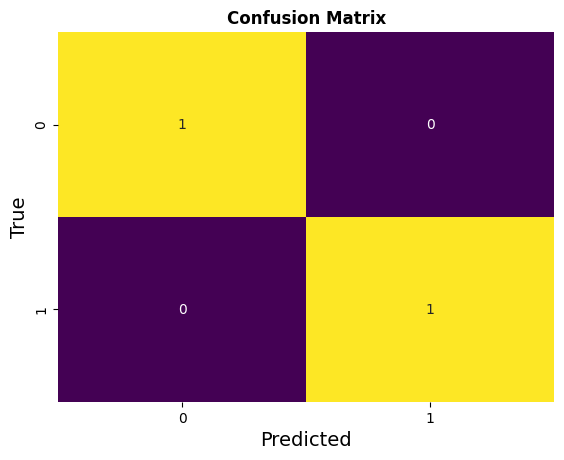

              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00        38
    NonFresh       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


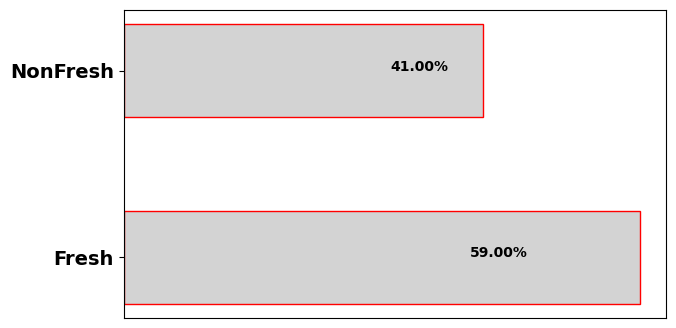

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Define the path to your dataset
data_dir = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets'  # Update this path as needed
img_height, img_width = 224, 224  # Image size

# Function to filter dataset for only Anchovy class and relabel as Fresh or NonFresh
def filter_anchovy_dataset(dataset, fresh_label, non_fresh_label):
    filtered_images = []
    filtered_labels = []

    # Iterating through the dataset
    for images, labels in dataset:
        for i, label in enumerate(labels):
            # Assuming Anchovy class is labeled 0 or adjust accordingly based on your dataset
            # Modify as necessary if your Anchovy class label index is different
            if label == fresh_label or label == non_fresh_label:
                filtered_images.append(images[i].numpy())
                filtered_labels.append(label.numpy())

    # Convert filtered lists to tensors
    filtered_images = np.array(filtered_images)
    filtered_labels = np.array(filtered_labels)

    # Convert to TensorFlow dataset
    filtered_ds = tf.data.Dataset.from_tensor_slices((filtered_images, filtered_labels))
    # Batch the dataset
    filtered_ds = filtered_ds.batch(32)  # Ensure proper batching with batch size 32 or any desired size
    return filtered_ds

# Load the training dataset with all classes
train_ds_full = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)

# Load the validation dataset with all classes
val_ds_full = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)

# Retrieve class names
class_names = train_ds_full.class_names

# Define the Anchovy class labels for fresh and non-fresh based on dataset
# Adjust the indices according to your actual dataset; here, assuming Anchovy is index 0.
anchovy_fresh_label = 0  # Assume fresh Anchovy is labeled as 0
anchovy_non_fresh_label = 1  # Assume non-fresh Anchovy is labeled as 1

# Filter the datasets to only include fresh and non-fresh Anchovy images
train_ds = filter_anchovy_dataset(train_ds_full, anchovy_fresh_label, anchovy_non_fresh_label)
val_ds = filter_anchovy_dataset(val_ds_full, anchovy_fresh_label, anchovy_non_fresh_label)

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Update class names to only "Fresh" and "NonFresh"
class_names = ['Fresh', 'NonFresh']
num_classes = len(class_names)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)

# Train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[earlystop_callback])

# Save the trained model
model_path = 'saved_model/anchovy_fish_freshness_model.h5'  # Update this path as needed
model.save(model_path)

# Load the saved model
model = load_model(model_path)

# Evaluate the model on the validation set
loss, acc = model.evaluate(val_ds)
print("Validation accuracy:", round(acc, 2))
print("Validation loss:", round(loss, 2))

# Predict on a validation set to get labels for confusion matrix
predicted_labels = []
correct_labels = []

for images, labels in val_ds:
    preds = model.predict(images)
    predicted_labels.extend(np.argmax(preds, axis=-1))
    correct_labels.extend(labels)

# Confusion matrix and classification report
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
plt.title("Confusion Matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

print(classification_report(correct_labels, predicted_labels, target_names=class_names))

# Function to make predictions on a single image
def prediction(img_path):
    # Load and preprocess the image
    my_image = load_img(img_path, target_size=(img_height, img_width))
    my_image = img_to_array(my_image)
    my_image = np.expand_dims(my_image, axis=0)  # Add batch dimension

    # Get prediction
    out = np.round(model.predict(my_image)[0], 2)

    # Plot the results
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray', edgecolor='red', linewidth=1, height=0.5)

    # Annotate the bars with prediction values
    for index, value in enumerate(out):
        plt.text(value / 2 + 0.1, index, f"{100 * value:.2f}%", fontweight='bold')

    plt.xticks([])
    plt.yticks(range(len(class_names)), labels=class_names, fontweight='bold', fontsize=14)
    fig.savefig('pred_img.png', bbox_inches='tight')

    plt.show()

# Prediction on a single image
img_path = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\application\static\uploads\NonFresh.jpg'  # Ensure this path is correct and the image exists
prediction(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


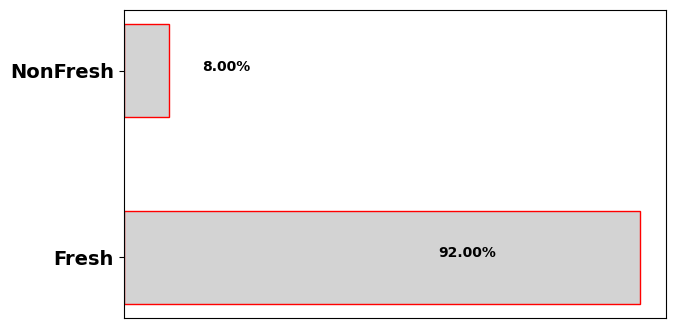

In [30]:
####### Prediction on single Image
## FRESH IMAGE PREDICTION

img = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\Fresh\HamsiTaze (1).jpg'
prediction(img)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


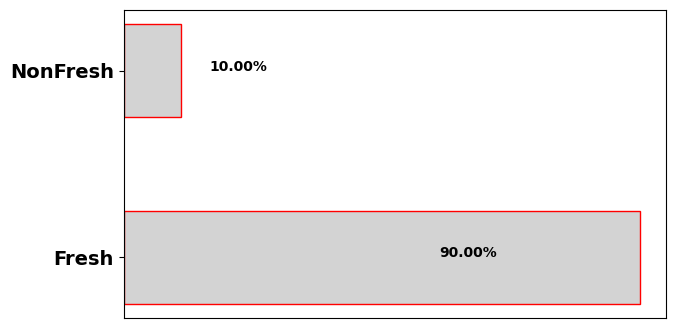

In [31]:
## ANCHOVY FRESH FISH
img = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\Anchovy\NonFresh\HamsiBayat (2).jpg'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


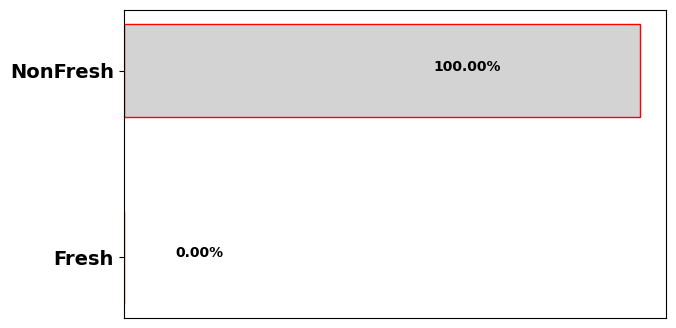

In [32]:
####### Prediction on single Image
##  Non FRESH IMAGE PREDICTION

img = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\Fresh\IstavritTaze (2).jpg'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


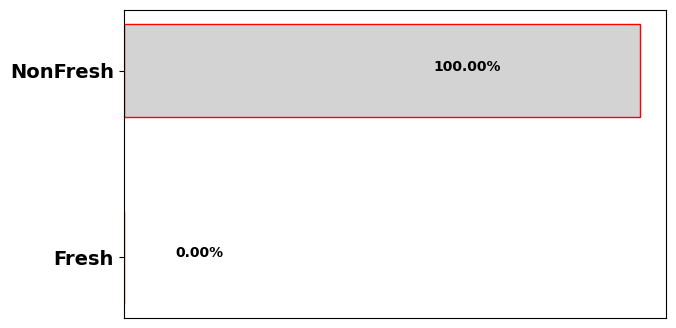

In [33]:
####### Prediction on single Image
##  Non FRESH IMAGE PREDICTION

img = r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\HorseMackerel\NonFresh\IstavritBayat (6).jpg'
prediction(img)

In [35]:
import tensorflow as tf

# Load the .h5 model
model = tf.keras.models.load_model(r'D:\SARAVANA\FINALFISH\FishFreshnessdetection\Datasets\saved_model\anchovy_fish_freshness_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('anchovy_fish_freshness_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TFLite format successfully!")

INFO:tensorflow:Assets written to: C:\Users\sutha\AppData\Local\Temp\tmp38zinwb8\assets


INFO:tensorflow:Assets written to: C:\Users\sutha\AppData\Local\Temp\tmp38zinwb8\assets


Saved artifact at 'C:\Users\sutha\AppData\Local\Temp\tmp38zinwb8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2311190749328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190752208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190750480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190751056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190752400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190752592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190752784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190753552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190753936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2311190755088: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model 